# Project: Wrangling and Analyze Data

In [57]:
import pandas as pd
import numpy as np
import requests
import io
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [58]:
# Import csv file 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [59]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Sends a GET request to the url to get data
r = requests.get(url)

with open('image_prediction.tsv', mode='wb') as file:
    file.write(r.content)

df_img_predict = pd.read_csv('image_prediction.tsv', sep= '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [60]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [61]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [6]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [62]:
df_tweet_api = []
# Open the text file
with open('tweet_json.txt', 'r', encoding='utf8') as file:
    for line in file:
        # Convert JSON string into a python dictionary         
        lines = json.loads(line)
        # Append data from lines dictionary to the list          
        df_tweet_api.append({'tweet_id': lines['id'],
                        'favorites': lines['favorite_count'],
                        'retweets': lines['retweet_count'],
                        'timestamp': lines['created_at']})
# Convert list to dataframe
df_tweet_api = pd.DataFrame(df_tweet_api, columns=['tweet_id','timestamp','favorites','retweets'])

## Assessing Data


We start assessing df_archive table.

In [63]:
# View the tabel for visual Assessment
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


> **Observations**
 <ul>
  <li> A lot of missing value in the following columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo).</li>
  <li> Some missing values in name column like in index 5 and 7.</li>
  <li> Some incorrect names in name column like a, an and such.</li>
  <li> The four last columns headers are values under dog_stage column and not as variables.</li>
 </ul>

Now, perform programmatic assessment.

In [64]:
# Data properties 
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [65]:
# View rows with Nan value 
# in expanded_urls column
df_archive[df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [66]:
# Check any duplication for tweet_id column 
df_archive.tweet_id.duplicated().sum()

0

In [67]:
# Check for correct name format
df_archive[~(df_archive.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [68]:
# Check incorrect names
df_archive[df_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [69]:
# View summary statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# View all rows with rating_denominator not 10
df_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


> **Observations**
 <ul>
  <li> tweet_id column should be string rather than integer.</li>
  <li> timestamp and retweeted_status_timestamp columns should be datetime rather than string.</li>
  <li> Some missing data in expanded_urls column.</li>
  <li> Some incorrect names for dogs in name column in lowercase, like a, an, and such.</li>
  <li> Null data in the last five columns (name,doggo, floofer, pupper, puppo) not represented as nan value.</li>
  <li> Inaccurate data in rating_numerator column extremely high value with more than 100 and rating_denominator have other value than 10.</li> 
 </ul>

Assessment of df_img_predict table.

In [70]:
# View the tabel for visual Assessment
df_img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


> **Observations**
 <ul>
  <li> p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog columns don't have represntitve name.</li>
  <li> p1, p2, p3 have not consistent format (some predictions start with a lowercase letter).</li>   
 </ul>

Perform programmatic assessment.

In [71]:
# Data properties 
df_img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
# Check any duplication for tweet_id column 
df_img_predict.tweet_id.duplicated().sum()

0

> **Observations**
 <ul>
  <li> tweet_id column should be string rather than integer.</li>
 </ul>

In [73]:
# View the tabel for visual Assessment
df_tweet_api

,tweet_id,timestamp,favorites,retweets
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,34490,7175
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29911,5391
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22511,3554
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,37728,7399
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,36023,7936
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,18179,2668
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,10583,1712
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,58053,16147
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,25029,3702
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,28546,6233


In [74]:
# Data properties 
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
tweet_id     2328 non-null int64
timestamp    2328 non-null object
favorites    2328 non-null int64
retweets     2328 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [75]:
# Check any duplication for tweet_id column 
df_tweet_api.tweet_id.duplicated().sum()

0

> **Observations**
 <ul>
   <li> tweet_id column should be string rather than integer.</li>
   <li> timestamp column should be datetime rather than string.</li>
 </ul>

For this project, we will tackle the quality issues and tidiness issues listed below.

### Quality issues

##### `df_archive` table

1. Wrong datatype for tweet_id and timestamp columns

2. None values in name column instead of Nan

3. Some missing values in expanded_url column

4. Missing data in the four last columns (doggo, floofer, pupper, and puppo) represented as None string

5. Incorrect names with lowercase in name column like a, an, and such

6. Rating_denominator not always have the value 10

7. Only want original ratings (no retweets or replies)

##### `df_img_prediction` table

1. Unclear column names(p1,p1_conf,p1_dog,...,and p3_dog)

2. No consistant format for prediction names in p1,p2, and p3 columns (some names start with a lowercase)

3. Wrong datatype for tweet_id column
 
##### `df_tweet_api` table

1. Wrong datatype for tweet_id and timestamp columns


### Tidiness issues

1. One variable in four columns in `df_archive` table (dog_stage column)

2. The three tables are related (forms a table)

## Cleaning Data

In [95]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_img_predict_clean = df_img_predict.copy()
df_tweet_api_clean = df_tweet_api.copy()

### Tidiness

#### One variable in four columns in df_archive table (dog_stage column)

#### Define
Extract the four dogs type from the text using str.extract method and save it in new variable. Drop the four columns. Convert data type of the dog_stage column into category.

#### Code

In [96]:
# Extract the
df_archive_clean['dog_stage'] = df_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
# Drop columns
df_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace= True)
# Convert data type to categorical 
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')

#### Test

In [97]:
df_archive_clean.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


**Note:** We solved a quality issue by extracting and creating the new variable "Missing data in the four last columns (doggo, floofer, pupper, and puppo) represented as None string".

#### The three tables are related (forms a table)

#### Define:
Merge all tables columns into one table by merging two tables in each step, creating a master dataframe.

#### Code

In [98]:
df_master = pd.merge(df_archive_clean, df_img_predict_clean,
                            on=['tweet_id'], how='inner')
df_master = pd.merge(df_master, df_tweet_api_clean,
                            on=['tweet_id'], how='inner')

#### Test

In [99]:
df_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorites,retweets
1104,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,...,False,Chesapeake_Bay_retriever,0.077373,True,Mexican_hairless,0.049472,True,Thu Mar 03 02:49:06 +0000 2016,2441,743
1215,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344...,...,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,Thu Feb 04 02:00:27 +0000 2016,1511,546
168,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,...,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True,Tue Apr 11 00:24:08 +0000 2017,15289,3204
154,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394...,...,True,toy_poodle,0.189158,True,Labrador_retriever,0.144195,True,Tue Apr 18 23:50:52 +0000 2017,27175,6176
408,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,...,True,Siberian_husky,0.166151,True,Eskimo_dog,0.069811,True,Mon Dec 19 01:26:42 +0000 2016,10637,2524


In [100]:
# Check number of data 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 28 columns):
tweet_id                      2058 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp_x                   2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
dog_stage                     334 non-null category
jpg_url                       2058 non-null object
img_num                       2058 non-null int64
p1                            2058 non-null object
p1_conf                       2058 

### Quality

#### Only want original ratings (no retweets or replies)

#### Define:
Drop uneeded columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp) from the master table.

#### Code

In [101]:
# Drop columns
df_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                          'retweeted_status_id', 'retweeted_status_user_id',
                                      'retweeted_status_timestamp'], axis = 1, inplace = True)


#### Test

In [102]:
df_master.head(2)

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,34490,7175
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,29911,5391


#### Unclear column names (p1,p1_conf,p1_dog,...,and p3_dog)

#### Define
Change column name in table df_img_prediction to more representative names using rename method.

#### Code

In [103]:
# Change columns name
df_master.rename(columns={'p1': 'predict_1', 'p1_conf': 'predict_1_confidence','p1_dog': 'predict_1_is_dog',
                  'p2': 'predict_2', 'p2_conf': 'predict_2_confidence','p2_dog': 'predict_2_is_dog',
                  'p3': 'predict_3', 'p3_conf': 'predict_3_confidence','p3_dog': 'predict_3_is_dog'}, inplace = True)

#### Test

In [104]:
df_master.sample()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,predict_1_is_dog,predict_2,predict_2_confidence,predict_2_is_dog,predict_3,predict_3_confidence,predict_3_is_dog,timestamp_y,favorites,retweets
217,840268004936019968,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,NaN,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,...,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True,Fri Mar 10 18:27:58 +0000 2017,18333,5360


#### Incorrect names with lowercase in name column like a, an, and such

#### Define
Replace all incorrect names with lowercase to string none

#### Code

In [105]:
# Change all incorrect names to np.nan
def wrong_names(row):
    if row['name'][0].islower() == True:
        return np.nan
    else:
        return row['name']
    
# Call function and apply by columns
df_master['name'] = df_master.apply(wrong_names, axis = 1)

# Change all the'None' in names to np.nan
df_master['name'].replace('None', np.nan, inplace=True)

#### Test

In [107]:
df_master['name'].str.islower().sum()

0

In [111]:
(df_master['name'] == 'None').sum()

0

#### No consistant format for prediction names in p1,p2, and p3 columns (some names start with a lowercase)

#### Define
Capitalize all names in columns predict_1, predict_2, and predict_3 using capitalize method.

#### Code

In [112]:
# Capitalize the three predict columns
df_master.predict_1 = df_master.predict_1.str.capitalize()
df_master.predict_2 = df_master.predict_2.str.capitalize()
df_master.predict_3 = df_master.predict_3.str.capitalize()

#### Test

In [113]:
(df_master.predict_1.str.islower()).sum()

0

In [114]:
(df_master.predict_2.str.islower()).sum()

0

In [115]:
(df_master.predict_3.str.islower()).sum()

0

#### Rating_denominator not always have the value 10

#### Define
Drop all rows with rating_denominator not equal 10.

#### Code

In [116]:
df_master = df_master[df_master.rating_denominator == 10]

#### Test

In [117]:
df_master[df_master.rating_denominator != 10]

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,predict_1_is_dog,predict_2,predict_2_confidence,predict_2_is_dog,predict_3,predict_3_confidence,predict_3_is_dog,timestamp_y,favorites,retweets


#### Some missing values in expanded_url column

#### Define
Drop all missing value in expanded_urls column.

#### Code

In [118]:
# Drop missing data
df_master = df_master[df_master.expanded_urls.notnull()]

#### Test

In [119]:
df_master.expanded_urls.isna().sum()

0

#### Wrong datatype for  tweet_id and two timestamp columns 

#### Define
Change column tweet_id to string using astype method. Also, change column timestamp_x and timestamp_y to datetime format.

#### Code

In [120]:
# Convert tweet_id column data to string
df_master.tweet_id = df_master.tweet_id.astype(str)
# Convert the two timestamp columns data to datetime
df_master.timestamp_x = pd.to_datetime(df_master.timestamp_x)
df_master.timestamp_y = pd.to_datetime(df_master.timestamp_y)

#### Test

In [121]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2057
Data columns (total 23 columns):
tweet_id                2040 non-null object
timestamp_x             2040 non-null datetime64[ns]
source                  2040 non-null object
text                    2040 non-null object
expanded_urls           2040 non-null object
rating_numerator        2040 non-null int64
rating_denominator      2040 non-null int64
name                    1383 non-null object
dog_stage               327 non-null category
jpg_url                 2040 non-null object
img_num                 2040 non-null int64
predict_1               2040 non-null object
predict_1_confidence    2040 non-null float64
predict_1_is_dog        2040 non-null bool
predict_2               2040 non-null object
predict_2_confidence    2040 non-null float64
predict_2_is_dog        2040 non-null bool
predict_3               2040 non-null object
predict_3_confidence    2040 non-null float64
predict_3_is_dog        2040 non-

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [122]:
df_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [123]:
import matplotlib.pyplot as plt
% matplotlib inline

In [124]:
# Import data 
df = pd.read_csv('twitter_archive_master.csv')

### Insights:

1. Frequency of each dog stage.

In [125]:
stage_appear = df.groupby('dog_stage').dog_stage.count()
print ('Dog stage frequency: \n', stage_appear)

Dog stage frequency: 
 dog_stage
doggo       72
floofer      3
pupper     224
puppo       28
Name: dog_stage, dtype: int64



2. Top 10 popular dog name

In [126]:
dog_name = df.name.value_counts().sort_values(ascending=False).head(10)
print ('Popular dog name: \n', dog_name)

Popular dog name: 
 Charlie    10
Tucker     10
Cooper     10
Penny      10
Oliver     10
Lucy        9
Lola        8
Bo          8
Sadie       8
Winston     8
Name: name, dtype: int64


3. What is the average rating_numerator of each dog stage? 

In [127]:
avg_rate = df.groupby('dog_stage').rating_numerator.median()
print('average rating of each dog stage: \n', avg_rate)

average rating of each dog stage: 
 dog_stage
doggo      12
floofer    13
pupper     11
puppo      12
Name: rating_numerator, dtype: int64


### Visualization

Which stage of dog do people love the most?

In [128]:
# Get data ready for plotting

# Favorites for each dog stage
dog_favor = df.groupby('dog_stage').favorites.sum().sort_values(ascending=False)

# Retweet for each dog stage
dog_retweet = df.groupby('dog_stage').retweets.sum().sort_values(ascending=False)

print('Favorites sum for each dog stage',dog_favor)
print('\nRetweet sum for each dog stage',dog_retweet)

Favorites sum for each dog stage dog_stage
pupper     1371624
doggo      1105541
puppo       562019
floofer      59902
Name: favorites, dtype: int64

Retweet sum for each dog stage dog_stage
pupper     455145
doggo      381732
puppo      158787
floofer     20896
Name: retweets, dtype: int64


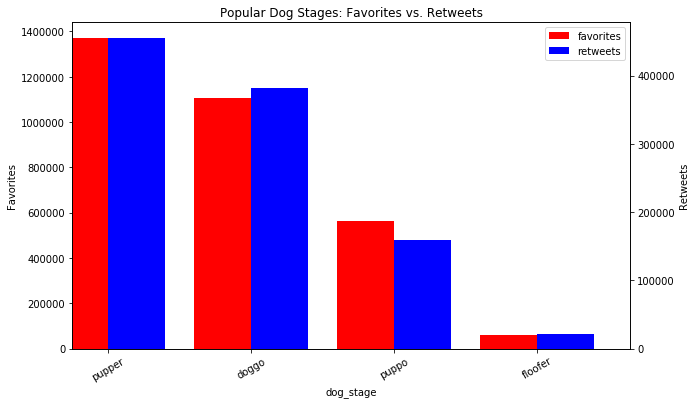

In [129]:
# Create subplot
fig, axis_1 = plt.subplots()
# Create additional y-axis
axis_2 = axis_1.twinx()


dog_favor.plot(figsize = (10,6), kind='bar', color='red', ax=axis_1, width=0.4, position=1, 
             title='Popular Dog Stages: Favorites vs. Retweets')
dog_retweet.plot(figsize = (10,6), kind='bar', color='blue', ax=axis_2, width=0.4, position=0)

# Define labels
axis_1.set_ylabel('Favorites')
axis_2.set_ylabel('Retweets')
axis_1.set_xticklabels(dog_favor.index, rotation=30)

# Show legend
handel_1, label_1 = axis_1.get_legend_handles_labels()
handel_2, label_2 = axis_2.get_legend_handles_labels()
plt.legend(handel_1+handel_2, label_1+label_2, loc=1);

#Save pic
plt.savefig('popular_dogs_stage.png', dpi=100)
